In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
batch_size = 2
epochs = 2
vocab_size = 100
emb_size = 128
hidden = 126
outputs = 1

class Model_sub(keras.Model):
    def __init__(self, vocab_size, emb_size, hidden, outputs):
        super(Model_sub,self).__init__()
        self.emb = keras.layers.Embedding(vocab_size, emb_size)
        self.hidden = keras.layers.Dense(hidden,'relu')
        self.outputs = keras.layers.Dense(outputs, 'sigmoid')
        
    def call(self, inputs):
        x = self.emb(inputs)
        x = tf.reduce_mean(x, axis = 1)
        x = self.hidden(x)
        x = self.outputs(x)
        
        return x
    
model_sub = Model_sub(vocab_size, emb_size, hidden, outputs)

In [3]:
samples = np.array(['너 오늘 이뻐 보인다',
          '나는 오늘 기분이 더러워',
          '끝내주는데, 좋은 일이 있나봐',
          '나 좋은 일이 생겼어',
          '아 오늘 진짜 짜증나',
          '환상적인데, 정말 좋은거 같아'])

targets =np.array([[1], [0], [1], [1], [0], [1]])

print(samples)
print(targets)

['너 오늘 이뻐 보인다' '나는 오늘 기분이 더러워' '끝내주는데, 좋은 일이 있나봐' '나 좋은 일이 생겼어'
 '아 오늘 진짜 짜증나' '환상적인데, 정말 좋은거 같아']
[[1]
 [0]
 [1]
 [1]
 [0]
 [1]]


In [4]:
tokenizer = keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(samples)
seq = tokenizer.texts_to_sequences(samples)
seq

[[4, 1, 5, 6],
 [7, 1, 8, 9],
 [10, 2, 3, 11],
 [12, 2, 3, 13],
 [14, 1, 15, 16],
 [17, 18, 19, 20]]

In [2]:
import glob

In [9]:
folder_path = os.path.dirname('./aclImdb/')

tt_lists = ['train','test']
pn_lists = ['pos','neg']

data = {}
for i in tt_lists:
    for j in pn_lists:
        file_lists = glob.glob(os.path.join(folder_path,i,j,'*.*'))
        
        data[i+'_'+j] = []
        for k in file_lists:
            with open(k, 'rt', encoding='utf-8') as f:
                data[i+'_'+j].append(f.read())
                


{'train_pos': ['Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High\'s satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers\' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I\'m here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn\'t!',
  'Homelessness (or Houselessness as George Carlin stated) has been an issue for years but never a plan to help those on the street that were once considered human who did

In [3]:
DATA_IN_PATH = './data_in/'
DATA_OUT_PATH = './data_out/'

In [4]:
train_data = pd.read_csv(DATA_IN_PATH + 'labeledTrainData1.tsv',
                         header=0,
                         delimiter='\t', quoting= 3)

print(train_data.shape)
train_data.head()

(25000, 3)


id  sentiment                                             review
0  "5814_8"          1  "With all this stuff going down at the moment ...
1  "2381_9"          1  "\"The Classic War of the Worlds\" by Timothy ...
2  "7759_3"          0  "The film starts with a manager (Nicholas Bell...
3  "3630_4"          0  "It must be assumed that those who praised thi...
4  "9495_8"          1  "Superbly trashy and wondrously unpretentious ...

In [5]:
## EDA

review = train_data['review']

## word length
tokenized_review = [len(x.split()) for x in review]
print(f'word 갯수: {tokenized_review}')
eumjeol_review = [len(x.replace(' ','')) for x in review]
print(f'eumjeol 갯수: {eumjeol_review}')

word 갯수: [433, 158, 378, 379, 367, 89, 112, 132, 163, 43, 48, 172, 382, 130, 112, 187, 395, 456, 241, 118, 231, 274, 254, 43, 38, 141, 225, 254, 670, 123, 54, 116, 120, 328, 373, 284, 135, 115, 169, 542, 250, 140, 121, 174, 164, 115, 80, 134, 252, 194, 161, 97, 212, 140, 57, 139, 148, 170, 72, 379, 515, 226, 132, 137, 122, 55, 968, 73, 194, 129, 128, 425, 184, 185, 130, 146, 263, 92, 192, 138, 133, 273, 420, 191, 428, 294, 346, 51, 124, 110, 107, 117, 124, 136, 136, 141, 165, 73, 197, 84, 215, 869, 94, 165, 48, 107, 125, 121, 361, 423, 183, 208, 321, 69, 117, 227, 124, 156, 106, 127, 187, 365, 136, 274, 337, 804, 463, 325, 111, 214, 133, 618, 166, 569, 425, 26, 328, 177, 168, 136, 166, 272, 165, 156, 255, 184, 169, 281, 334, 113, 83, 179, 161, 313, 288, 97, 225, 351, 453, 167, 344, 219, 104, 141, 243, 132, 933, 136, 112, 153, 171, 216, 282, 143, 440, 133, 349, 130, 152, 222, 445, 418, 789, 126, 221, 138, 85, 395, 119, 135, 771, 106, 67, 157, 74, 278, 74, 276, 224, 102, 110, 241, 121, 2

In [6]:
review_apply_word = train_data['review'].str.split().apply(len)
review_apply_eumjeol = train_data['review'].str.replace(" ",'').apply(len)
review_apply_word
review_apply_eumjeol

0        1872
1         791
2        2074
3        1869
4        1867
         ... 
24995     488
24996     804
24997     517
24998     947
24999     761
Name: review, Length: 25000, dtype: int64

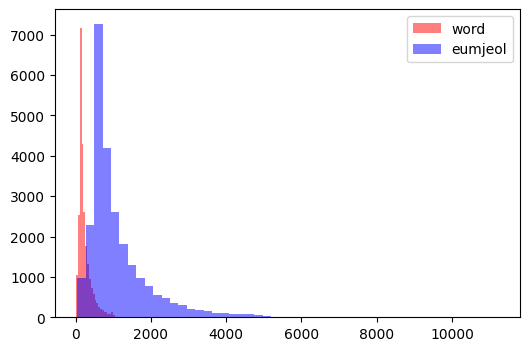

In [7]:
plt.figure(figsize=(6,4))
plt.hist(tokenized_review, bins= 50, color='r', alpha = 0.5, label = 'word')
plt.hist(eumjeol_review, bins= 50, color='b', alpha = 0.5, label = 'eumjeol')
# plt.yscale('log')

plt.legend()
plt.show()

In [8]:
def summary_token(x):
    print('문장의 평균 길이 : {}'.format(np.mean(x)))
    print('문장의 최대 길이 : {}'.format(np.max(x)))
    print('문장의 최소 길이 : {}'.format(np.min(x)))
    print('문장의 중간 길이 : {}'.format(np.median(x)))
    print('문장의 표준편차 : {}'.format(np.std(x)))
    print('문장의 1 사분위 : {}'.format(np.quantile(x, 0.25)))
    print('문장의 4 사분위 : {}'.format(np.quantile(x, 0.75)))
    
summary_token(tokenized_review)
print('='*50)
summary_token(eumjeol_review)

문장의 평균 길이 : 233.78824
문장의 최대 길이 : 2470
문장의 최소 길이 : 10
문장의 중간 길이 : 174.0
문장의 표준편차 : 173.73034909796965
문장의 1 사분위 : 127.0
문장의 4 사분위 : 284.0
문장의 평균 길이 : 1096.92432
문장의 최대 길이 : 11241
문장의 최소 길이 : 45
문장의 중간 길이 : 809.0
문장의 표준편차 : 832.1568658086874
문장의 1 사분위 : 579.0
문장의 4 사분위 : 1335.25


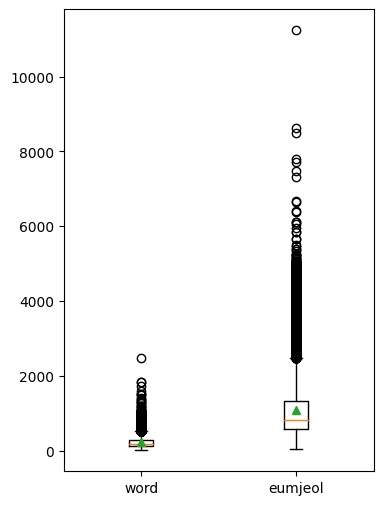

In [9]:
plt.figure(figsize=(4,6))
plt.boxplot([tokenized_review,eumjeol_review],
            labels=['word','eumjeol'],
            showmeans=True)

plt.show()

In [10]:
from wordcloud import WordCloud, STOPWORDS

mytext = " ".join(review)


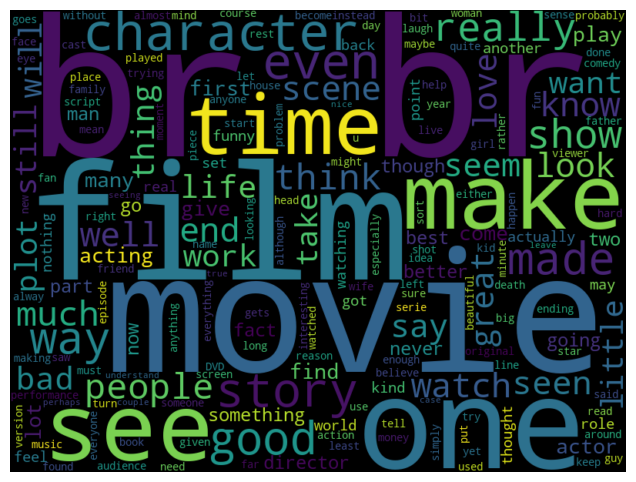

In [11]:
word_cloud = WordCloud(stopwords=STOPWORDS,
                       width= 800, height=600).generate(mytext)
plt.figure(figsize=(8,6))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
train_data['sentiment']

import seaborn as sns

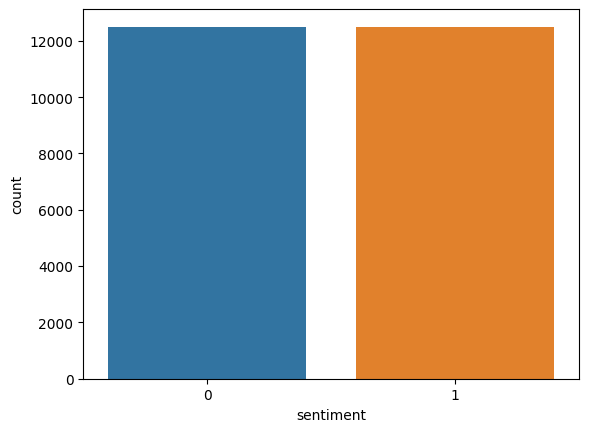

In [13]:
sns.countplot(x = 'sentiment', data = train_data)
plt.show()

In [14]:
train_data['sentiment'].value_counts()

sentiment
1    12500
0    12500
Name: count, dtype: int64

In [16]:
df = pd.DataFrame([[1,2],[3,4]],columns=['A','B'])
print(df)

df1 = pd.DataFrame({
    'A':[1,3],
    'B':[2,4]
})
print(df1)

   A  B
0  1  2
1  3  4
   A  B
0  1  2
1  3  4


In [17]:
def add_one(x):
    x = x + 1
    return x

y = add_one(3)
y

4

In [19]:
df['A'] = df['A'].apply(add_one)

print(df)

   A  B
0  2  2
1  4  4


In [20]:
df = df.apply(add_one)

print(df)

   A  B
0  3  3
1  5  5


In [21]:
df = df.apply(lambda x: x + 1)
print(df)

   A  B
0  4  4
1  6  6


In [22]:
# train_word_counts = [len(x.split() for x in review)]

train_word_counts = train_data['review'].apply(lambda x:len(x.split()))
train_word_counts

0        433
1        158
2        378
3        379
4        367
        ... 
24995     95
24996    174
24997    127
24998    197
24999    184
Name: review, Length: 25000, dtype: int64

In [23]:
summary_token(train_word_counts)

문장의 평균 길이 : 233.78824
문장의 최대 길이 : 2470
문장의 최소 길이 : 10
문장의 중간 길이 : 174.0
문장의 표준편차 : 173.73034909796965
문장의 1 사분위 : 127.0
문장의 4 사분위 : 284.0


In [24]:
train_data['review'].apply(lambda x:'?' in x)

0         True
1        False
2        False
3         True
4         True
         ...  
24995    False
24996    False
24997    False
24998     True
24999    False
Name: review, Length: 25000, dtype: bool

In [25]:
np.mean(train_data['review'].apply(lambda x:'?' in x))

0.29552

In [28]:
qmarks = np.mean(train_data['review'].apply(lambda x:'?' in x))
fullstop = np.mean(train_data['review'].apply(lambda x:'.' in x))
capital_first = np.mean(train_data['review'].apply(lambda x:x[1].isupper()))
capital = np.mean(train_data['review'].apply(lambda x:max([y.isupper() for y in x])))
numbers = np.mean(train_data['review'].apply(lambda x:max([y.isdigit() for y in x])))

print(f'물음표 {qmarks}')
print(f'마침표 {fullstop}')
print(f'첫 대문자 {capital_first}')
print(f'대문자 {capital}')
print(f'숫자 {numbers}')

물음표 0.29552
마침표 0.99688
첫 대문자 0.92844
대문자 0.99592
숫자 0.56656


In [30]:
# !pip install bs4

  Using cached bs4-0.0.1.tar.gz (1.1 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached beautifulsoup4-4.12.2-py3-none-any.whl (142 kB)
  Using cached soupsieve-2.4.1-py3-none-any.whl (36 kB)
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1264 sha256=9ef8b2aac2f8eb107a230c677a2d0004b96a0ebfc29be31a97be847671404a29
  Stored in directory: c:\users\hyun9\appdata\local\pip\cache\wheels\75\78\21\68b124549c9bdc94f822c02fb9aa3578a669843f9767776bca
Successfully built bs4


In [31]:
import json
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords

In [35]:
html_text = \
'''
<p> O’er all the hilltops<br>
    Is quiet now,<br>
    In all the treetops<br>
    Hearest thou<br>
    Hardly a breath;<br>
    The birds are asleep in the trees:<br>
    Wait, soon like these<br>
    Thou too shalt rest.
</p>
'''
html_text_soup = BeautifulSoup(html_text,'html').get_text()
print(html_text_soup)

resub_text = re.sub('[^a-zA-Z]'," ",html_text_soup)

resub_text

 O’er all the hilltops
    Is quiet now,
    In all the treetops
    Hearest thou
    Hardly a breath;
    The birds are asleep in the trees:
    Wait, soon like these
    Thou too shalt rest.




' O er all the hilltops     Is quiet now      In all the treetops     Hearest thou     Hardly a breath      The birds are asleep in the trees      Wait  soon like these     Thou too shalt rest   '

In [38]:
review = train_data['review'][0]

review

review_soup = BeautifulSoup(review, 'html').get_text()
review_text = re.sub('[^a-zA-Z]',' ', review_soup)

print('review', review)
print('review_soup', review_soup)
print('review_text', review_text)

review "With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it fina

In [40]:
stop_words = stopwords.words('english')

In [43]:
stop_words = stopwords.words('english')
review_lower = review_text.lower() # 소문자

splited_text = review_lower.split() # tokenizer
words = [w for w in splited_text if not w in stop_words] # 불용어 제거

print(len(splited_text))
print(len(words))

437
219


In [44]:
clean_review = ' '.join(words)
clean_review

'stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate workin

In [45]:
def preprocessing(review, remove_stopwords = False):
    review_text = BeautifulSoup(review,'html').get_text()
    
    review_text = re.sub('[^a-zA-Z]',' ',review_text)
    
    words = review_text.lower().split()
    
    if remove_stopwords == True:
        stop_words = stopwords.words('english')
        words = [w for w in words if not w in stop_words]
        clean_review = " ".join(words)
    else:
        clean_review = " ".join(words)
        
    return clean_review

In [46]:
clean_train_review = []

for i in train_data['review']:
    x = preprocessing(i, remove_stopwords=True)
    clean_train_review.append(x)
    
clean_train_review[:5]

C:\Users\hyun9\AppData\Local\Temp\ipykernel_20760\1380442030.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(review,'html').get_text()


['stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate worki

In [47]:
clean_train_df = pd.DataFrame({
    'review': clean_train_review,
    'sentiment': train_data['sentiment']
})

clean_train_df.head()

review  sentiment
0  stuff going moment mj started listening music ...          1
1  classic war worlds timothy hines entertaining ...          1
2  film starts manager nicholas bell giving welco...          0
3  must assumed praised film greatest filmed oper...          0
4  superbly trashy wondrously unpretentious explo...          1

In [48]:
tokenizer = keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(clean_train_review)

text_sequences = tokenizer.texts_to_sequences(clean_train_review)
len(text_sequences)

25000

In [51]:
len(tokenizer.word_index)
text_sequences[0]

[404,
 70,
 419,
 8815,
 506,
 2456,
 115,
 54,
 873,
 516,
 178,
 18686,
 178,
 11242,
 165,
 78,
 14,
 662,
 2457,
 117,
 92,
 10,
 499,
 4074,
 165,
 22,
 210,
 581,
 2333,
 1194,
 11242,
 71,
 4826,
 71,
 635,
 2,
 253,
 70,
 11,
 302,
 1663,
 486,
 1144,
 3265,
 8815,
 411,
 793,
 3342,
 17,
 441,
 600,
 1500,
 15,
 4424,
 1851,
 998,
 146,
 342,
 1442,
 743,
 2424,
 4,
 8815,
 418,
 70,
 637,
 69,
 237,
 94,
 541,
 8815,
 26055,
 26056,
 120,
 1,
 8815,
 323,
 8,
 47,
 20,
 323,
 167,
 10,
 207,
 633,
 635,
 2,
 116,
 291,
 382,
 121,
 15535,
 3315,
 1501,
 574,
 734,
 10013,
 923,
 11578,
 822,
 1239,
 1408,
 360,
 8815,
 221,
 15,
 576,
 8815,
 22224,
 2274,
 13426,
 734,
 10013,
 27,
 28606,
 340,
 16,
 41,
 18687,
 1500,
 388,
 11243,
 165,
 3962,
 8815,
 115,
 627,
 499,
 79,
 4,
 8815,
 1430,
 380,
 2163,
 114,
 1919,
 2503,
 574,
 17,
 60,
 100,
 4875,
 5100,
 260,
 1268,
 26057,
 15,
 574,
 493,
 744,
 637,
 631,
 3,
 394,
 164,
 446,
 114,
 615,
 3266,
 1160,
 684,
 48,


In [52]:
word_vocab = tokenizer.word_index
word_vocab['<PAD>'] = 0
word_vocab

{'movie': 1,
 'film': 2,
 'one': 3,
 'like': 4,
 'good': 5,
 'time': 6,
 'even': 7,
 'would': 8,
 'story': 9,
 'really': 10,
 'see': 11,
 'well': 12,
 'much': 13,
 'get': 14,
 'bad': 15,
 'people': 16,
 'also': 17,
 'first': 18,
 'great': 19,
 'made': 20,
 'way': 21,
 'make': 22,
 'could': 23,
 'movies': 24,
 'think': 25,
 'characters': 26,
 'character': 27,
 'watch': 28,
 'two': 29,
 'films': 30,
 'seen': 31,
 'many': 32,
 'life': 33,
 'plot': 34,
 'acting': 35,
 'never': 36,
 'love': 37,
 'little': 38,
 'best': 39,
 'show': 40,
 'know': 41,
 'ever': 42,
 'man': 43,
 'better': 44,
 'end': 45,
 'still': 46,
 'say': 47,
 'scene': 48,
 'scenes': 49,
 'go': 50,
 'something': 51,
 'back': 52,
 'real': 53,
 'watching': 54,
 'though': 55,
 'thing': 56,
 'old': 57,
 'years': 58,
 'actors': 59,
 'director': 60,
 'work': 61,
 'another': 62,
 'new': 63,
 'nothing': 64,
 'funny': 65,
 'actually': 66,
 'makes': 67,
 'look': 68,
 'find': 69,
 'going': 70,
 'part': 71,
 'lot': 72,
 'every': 73,
 'wo

In [53]:
data_config = {}
data_config['vocab'] = word_vocab
data_config['vocab_size'] = len(word_vocab)
data_config.keys()

dict_keys(['vocab', 'vocab_size'])

In [55]:
data_config['vocab']
data_config['vocab_size']

74066

In [59]:
sequence = [
    [1,2,3,4],
    [5,2,3],
    [6]
]

keras.preprocessing.sequence.pad_sequences(sequence, maxlen= 3,truncating='pre', padding = 'post')

array([[2, 3, 4],
       [5, 2, 3],
       [6, 0, 0]])

In [62]:
MAX_LENGTH = 174

train_input = keras.preprocessing.sequence.pad_sequences(text_sequences, maxlen= MAX_LENGTH)

train_input.shape
train_input[1]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
         232,   203,  3048,  3565,  7116,   317,     2,   405,   153,
          19,   634, 10967, 11898,  8816,  1653,  1035,  3494,   232,
         154,   314,  7116,  2701,   178,     2,  2349,    87,  1111,
         582,   217,  2219,   149,    73,   160,   626,  1035,  2882,
         194,   642,

In [63]:
TRAIN_INPUT_DATA = 'train_input.npy'
TRAIN_LABEL_DATA = 'train_label.npy'
TRAIN_CLEAN_DATA = 'train_clean.csv'
DATA_CONFIGS = 'data_configs.json'

In [64]:
# DATA_IN_PATH

np.save(DATA_IN_PATH + TRAIN_INPUT_DATA, train_input)
np.save(DATA_IN_PATH + TRAIN_LABEL_DATA, train_data['sentiment'])
clean_train_df.to_csv(DATA_IN_PATH + TRAIN_CLEAN_DATA, index= False)
json.dump(data_config, open(DATA_IN_PATH + DATA_CONFIGS,'w'),ensure_ascii=False)

In [65]:
test_data = pd.read_csv(DATA_IN_PATH + 'testData1.tsv',
                         header=0,
                         delimiter='\t', quoting= 3)

print(test_data.shape)
test_data.head()

(25000, 2)


id                                             review
0  "12311_10"  "Naturally in a film who's main themes are of ...
1    "8348_2"  "This movie is a disaster within a disaster fi...
2    "5828_4"  "All in all, this is a movie for kids. We saw ...
3    "7186_2"  "Afraid of the Dark left me with the impressio...
4   "12128_7"  "A very accurate depiction of small time mob l...

In [66]:
test_word_counts = test_data['review'].apply(lambda x:len(x.split()))
test_word_counts

0        131
1        169
2        176
3        112
4        133
        ... 
24995    148
24996    197
24997    164
24998    154
24999    165
Name: review, Length: 25000, dtype: int64

In [67]:
summary_token(test_word_counts)

문장의 평균 길이 : 228.52824
문장의 최대 길이 : 2278
문장의 최소 길이 : 4
문장의 중간 길이 : 172.0
문장의 표준편차 : 168.88139673303985
문장의 1 사분위 : 126.0
문장의 4 사분위 : 277.0


In [68]:
review_test = test_data['review'][0]

review_test

review_soup_test = BeautifulSoup(review_test, 'html').get_text()
review_text_test = re.sub('[^a-zA-Z]',' ', review_soup_test)

print('review', review_test)
print('review_soup', review_soup_test)
print('review_text', review_text_test)

review "Naturally in a film who's main themes are of mortality, nostalgia, and loss of innocence it is perhaps not surprising that it is rated more highly by older viewers than younger ones. However there is a craftsmanship and completeness to the film which anyone can enjoy. The pace is steady and constant, the characters full and engaging, the relationships and interactions natural showing that you do not need floods of tears to show emotion, screams to show fear, shouting to show dispute or violence to show anger. Naturally Joyce's short story lends the film a ready made structure as perfect as a polished diamond, but the small changes Huston makes such as the inclusion of the poem fit in neatly. It is truly a masterpiece of tact, subtlety and overwhelming beauty."
review_soup "Naturally in a film who's main themes are of mortality, nostalgia, and loss of innocence it is perhaps not surprising that it is rated more highly by older viewers than younger ones. However there is a crafts

In [69]:
# stop_words = stopwords.words('english')
review_lower_test = review_text_test.lower() # 소문자

splited_text_test = review_lower_test.split() # tokenizer
words_test = [w for w in splited_text_test if not w in stop_words] # 불용어 제거

print(len(splited_text_test))
print(len(words_test))

133
72


In [70]:
clean_review_test = ' '.join(words_test)
clean_review_test

'naturally film main themes mortality nostalgia loss innocence perhaps surprising rated highly older viewers younger ones however craftsmanship completeness film anyone enjoy pace steady constant characters full engaging relationships interactions natural showing need floods tears show emotion screams show fear shouting show dispute violence show anger naturally joyce short story lends film ready made structure perfect polished diamond small changes huston makes inclusion poem fit neatly truly masterpiece tact subtlety overwhelming beauty'

In [71]:
clean_test_review = []

for i in test_data['review']:
    x = preprocessing(i, remove_stopwords=True)
    clean_test_review.append(x)
    
clean_test_review[:5]

C:\Users\hyun9\AppData\Local\Temp\ipykernel_20760\1380442030.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(review,'html').get_text()


['naturally film main themes mortality nostalgia loss innocence perhaps surprising rated highly older viewers younger ones however craftsmanship completeness film anyone enjoy pace steady constant characters full engaging relationships interactions natural showing need floods tears show emotion screams show fear shouting show dispute violence show anger naturally joyce short story lends film ready made structure perfect polished diamond small changes huston makes inclusion poem fit neatly truly masterpiece tact subtlety overwhelming beauty',
 'movie disaster within disaster film full great action scenes meaningful throw away sense reality let see word wise lava burns steam burns stand next lava diverting minor lava flow difficult let alone significant one scares think might actually believe saw movie even worse significant amount talent went making film mean acting actually good effects average hard believe somebody read scripts allowed talent wasted guess suggestion would movie start 

In [72]:
clean_test_df = pd.DataFrame({
    'review': clean_test_review,
    'id': test_data['id']
})

clean_test_df.head()

review          id
0  naturally film main themes mortality nostalgia...  "12311_10"
1  movie disaster within disaster film full great...    "8348_2"
2  movie kids saw tonight child loved one point k...    "5828_4"
3  afraid dark left impression several different ...    "7186_2"
4  accurate depiction small time mob life filmed ...   "12128_7"

In [73]:
tokenizer = keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(clean_test_review)

text_sequences_test = tokenizer.texts_to_sequences(clean_test_review)
len(text_sequences_test)

25000

In [74]:
word_vocab_test = tokenizer.word_index
word_vocab_test['<PAD>'] = 0
word_vocab_test

{'movie': 1,
 'film': 2,
 'one': 3,
 'like': 4,
 'good': 5,
 'time': 6,
 'even': 7,
 'would': 8,
 'see': 9,
 'really': 10,
 'story': 11,
 'well': 12,
 'much': 13,
 'bad': 14,
 'get': 15,
 'great': 16,
 'people': 17,
 'also': 18,
 'first': 19,
 'make': 20,
 'made': 21,
 'could': 22,
 'movies': 23,
 'way': 24,
 'characters': 25,
 'think': 26,
 'watch': 27,
 'character': 28,
 'films': 29,
 'many': 30,
 'seen': 31,
 'two': 32,
 'love': 33,
 'never': 34,
 'plot': 35,
 'acting': 36,
 'show': 37,
 'know': 38,
 'life': 39,
 'best': 40,
 'ever': 41,
 'little': 42,
 'man': 43,
 'better': 44,
 'scene': 45,
 'end': 46,
 'say': 47,
 'scenes': 48,
 'still': 49,
 'something': 50,
 'go': 51,
 'back': 52,
 'real': 53,
 'thing': 54,
 'watching': 55,
 'funny': 56,
 'actors': 57,
 'director': 58,
 'another': 59,
 'years': 60,
 'actually': 61,
 'though': 62,
 'work': 63,
 'look': 64,
 'old': 65,
 'makes': 66,
 'lot': 67,
 'going': 68,
 'find': 69,
 'nothing': 70,
 'every': 71,
 'part': 72,
 'new': 73,
 'wo

In [75]:
data_config_test = {}
data_config_test['vocab'] = word_vocab_test
data_config_test['vocab_size'] = len(word_vocab_test)
data_config_test.keys()

dict_keys(['vocab', 'vocab_size'])

In [77]:
MAX_LENGTH = 172

test_input = keras.preprocessing.sequence.pad_sequences(text_sequences_test, maxlen= MAX_LENGTH)

test_input.shape
test_input[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,  1706,     2,   163,  1315, 19284,  4056,  1742,  2724,
         269,  1571,  1102,   408,   849,   678,   953,   542,    89,
       12348, 28070,     2,   129,   240,   895,  5504,  1795,    25,
         238,  1788,

In [78]:
TEST_INPUT_DATA = 'test_input.npy'
TEST_ID_DATA = 'test_id.npy'
TEST_CLEAN_DATA = 'test_clean.csv'

np.save(DATA_IN_PATH + TEST_INPUT_DATA, test_input)
np.save(DATA_IN_PATH + TEST_ID_DATA, test_data['id'])
clean_test_df.to_csv(DATA_IN_PATH + TEST_CLEAN_DATA, index= False)


In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import os

In [80]:
train_data = pd.read_csv('./data_in/train_clean.csv',header= 0)

print(train_data.shape)
print(train_data.head())

(25000, 2)
                                              review  sentiment
0  stuff going moment mj started listening music ...          1
1  classic war worlds timothy hines entertaining ...          1
2  film starts manager nicholas bell giving welco...          0
3  must assumed praised film greatest filmed oper...          0
4  superbly trashy wondrously unpretentious explo...          1


In [83]:
reviews = train_data['review']
semtiment = train_data['sentiment']

tfidf_vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(1,3),max_features=5000)
tfidf_vectorizer.fit(reviews)
seq = tfidf_vectorizer.transform(reviews)
X = seq.toarray()

In [85]:
X.shape

(25000, 5000)

In [86]:
y = np.array(semtiment)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20000, 5000)
(5000, 5000)
(20000,)
(5000,)


In [88]:
lgs = LogisticRegression(max_iter= 1000)
lgs.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [89]:
lgs.predict(X_test[:5])

array([1, 0, 1, 1, 1], dtype=int64)

In [90]:
y_test[:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [91]:
lgs.score(X_test, y_test)

0.8296

In [92]:
test_data = pd.read_csv('./data_in/test_clean.csv',header=0)

test_data.head()

review          id
0  naturally film main themes mortality nostalgia...  "12311_10"
1  movie disaster within disaster film full great...    "8348_2"
2  movie kids saw tonight child loved one point k...    "5828_4"
3  afraid dark left impression several different ...    "7186_2"
4  accurate depiction small time mob life filmed ...   "12128_7"

In [94]:
test_data_tfidf = tfidf_vectorizer.transform(test_data['review'])



In [95]:
lgs_predict = lgs.predict(test_data_tfidf)
lgs_predict

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [96]:
lgs_dataset = pd.DataFrame({
    'id':test_data['id'],
    'sentiment':lgs_predict
})

In [100]:
lgs_dataset

id  sentiment
0      "12311_10"          1
1        "8348_2"          0
2        "5828_4"          1
3        "7186_2"          0
4       "12128_7"          1
...           ...        ...
24995   "2155_10"          1
24996     "59_10"          1
24997    "2531_1"          1
24998    "7772_8"          1
24999  "11465_10"          0

[25000 rows x 2 columns]

In [98]:
lgs_dataset.to_csv('./data_out/lgs_tfidf_predict.csv', index=False,quoting=3)